In [1]:
%run ../chap09/cnn_ext_model.ipynb
%run ../chap09/dataset_dummy.ipynb

imagenet = DummyDataset('imagenet', 'select', [299,299,3], 200)

In [2]:
CnnExtModel.set_macro('v3_preproc',
    ['serial',
        ['conv', {'ksize':3, 'stride':2, 'chn':32, 'padding':'VALID'}],
        ['conv', {'ksize':3, 'chn':32, 'padding':'VALID'}],
        ['conv', {'ksize':3, 'chn':64, 'padding':'SAME'}],
        ['max', {'ksize':3, 'stride':2, 'padding':'VALID'}],
        ['conv', {'ksize':1, 'chn':80, 'padding':'VALID'}],
        ['conv', {'ksize':3, 'chn':192, 'padding':'VALID'}],
        ['max', {'ksize':3, 'stride':2, 'padding':'VALID'}]])

In [3]:
CnnExtModel.set_macro('v3_inception1',
    ['parallel',
        ['conv', {'ksize':1, 'chn':64}],
        ['serial',
            ['conv', {'ksize':1, 'chn':48}],
            ['conv', {'ksize':5, 'chn':64}]],
        ['serial',
            ['conv', {'ksize':1, 'chn':64}],
            ['conv', {'ksize':3, 'chn':96}],
            ['conv', {'ksize':3, 'chn':96}]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':'#chn'}]]])

In [4]:
CnnExtModel.set_macro('v3_resize1',
    ['parallel',
        ['conv', {'ksize':3, 'stride':2, 'chn':384}],
        ['serial',
            ['conv', {'ksize':1, 'chn':64}],
            ['conv', {'ksize':3, 'chn':96}],
            ['conv', {'ksize':3, 'stride':2, 'chn':96}]],
        ['avg', {'ksize':3, 'stride':2}]])

In [5]:
CnnExtModel.set_macro('v3_inception2',
    ['parallel',
        ['conv', {'ksize':1, 'chn':192}],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':'#chn'}],
            ['conv', {'ksize':[1,7], 'chn':'#chn'}],
            ['conv', {'ksize':[7,1], 'chn':192}]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':'#chn'}],
            ['conv', {'ksize':[7,1], 'chn':'#chn'}],
            ['conv', {'ksize':[1,7], 'chn':'#chn'}],
            ['conv', {'ksize':[7,1], 'chn':'#chn'}],
            ['conv', {'ksize':[1,7], 'chn':192}]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':192}]]])

In [6]:
CnnExtModel.set_macro('v3_resize2',
    ['parallel',
        ['serial',
            ['conv', {'ksize':1, 'chn':192}],
            ['conv', {'ksize':3, 'stride':2, 'chn':320}]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':192}],
            ['conv', {'ksize':[1,7], 'chn':192}],
            ['conv', {'ksize':[7,1], 'chn':192}],
            ['conv', {'ksize':[3,3], 'stride':[2,2], 'chn':192}]],
        ['avg', {'ksize':3, 'stride':2}]])

In [7]:
CnnExtModel.set_macro('v3_inception3',
    ['parallel',
        ['conv', {'ksize':1, 'chn':320}],
        ['serial',
            ['conv', {'ksize':[3,3], 'chn':384}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':384}],
                ['conv', {'ksize':[3,1], 'chn':384}]]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':448}],
            ['conv', {'ksize':[3,3], 'chn':384}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':384}],
                ['conv', {'ksize':[3,1], 'chn':384}]]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':192}]]])

In [8]:
CnnExtModel.set_macro('v3_postproc',
    ['serial',
        ['avg', {'stride':8}],
        ['dropout', {'keep_prob':0.7}]])

In [9]:
CnnExtModel.set_macro('inception_v3',
    ['serial',
        ['custom', {'name':'v3_preproc'}],
        ['custom', {'name':'v3_inception1', 'args':{'#chn':32}}],
        ['custom', {'name':'v3_inception1', 'args':{'#chn':64}}],
        ['custom', {'name':'v3_inception1', 'args':{'#chn':64}}],
        ['custom', {'name':'v3_resize1'}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':128}}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':160}}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':160}}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':192}}],
        ['custom', {'name':'v3_resize2'}],
        ['custom', {'name':'v3_inception3'}],
        ['custom', {'name':'v3_inception3'}],
        ['custom', {'name':'v3_postproc'}]])

In [10]:
inception_v3 = CnnExtModel('inception_v3', imagenet,
                   [['custom', {'name':'inception_v3'}]], dump_structure=True)

custom inception_v3
  serial
    custom v3_preproc
      serial
        1: conv, [299, 299, 3]=>[148, 148, 32] pm:3x3x3x32+32=896
        2: conv, [148, 148, 32]=>[146, 146, 32] pm:3x3x32x32+32=9248
        3: conv, [146, 146, 32]=>[146, 146, 64] pm:3x3x32x64+64=18496
        4: max, [146, 146, 64]=>[72, 72, 64]
        5: conv, [72, 72, 64]=>[72, 72, 80] pm:1x1x64x80+80=5200
        6: conv, [72, 72, 80]=>[70, 70, 192] pm:3x3x80x192+192=138432
        7: max, [70, 70, 192]=>[34, 34, 192]
    custom v3_inception1
      parallel
        8: conv, [34, 34, 192]=>[34, 34, 64] pm:1x1x192x64+64=12352
        serial
          9: conv, [34, 34, 192]=>[34, 34, 48] pm:1x1x192x48+48=9264
          10: conv, [34, 34, 48]=>[34, 34, 64] pm:5x5x48x64+64=76864
        serial
          11: conv, [34, 34, 192]=>[34, 34, 64] pm:1x1x192x64+64=12352
          12: conv, [34, 34, 64]=>[34, 34, 96] pm:3x3x64x96+96=55392
          13: conv, [34, 34, 96]=>[34, 34, 96] pm:3x3x96x96+96=83040
        serial
      

          107: conv, [8, 8, 2048]=>[8, 8, 192] pm:1x1x2048x192+192=393408
    custom v3_postproc
      serial
        108: avg, [8, 8, 2048]=>[1, 1, 2048]
        109: dropout, [1, 1, 2048]=>[1, 1, 2048]
110: full, [1, 1, 2048]=>200 pm:2048x200+200=409800
Total parameter count: 32401768


In [11]:
%run ../chap05/dataset_flowers.ipynb

fd = FlowersDataset([96,96], [96,96,3])

In [12]:
CnnExtModel.set_macro('flower_preproc',
    ['serial',
        ['conv', {'ksize':3, 'stride':2, 'chn':6, 'actions':'#act'}]])

CnnExtModel.set_macro('flower_inception1',
    ['parallel',
        ['conv', {'ksize':1, 'chn':4, 'actions':'#act'}],
        ['conv', {'ksize':3, 'chn':6, 'actions':'#act'}],
        ['serial',
            ['conv', {'ksize':3, 'chn':6, 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':6, 'actions':'#act'}]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':4, 'actions':'#act'}]]])

CnnExtModel.set_macro('flower_resize',
    ['parallel',
        ['conv', {'ksize':3, 'stride':2, 'chn':12, 'actions':'#act'}],
        ['serial',
            ['conv', {'ksize':3, 'chn':12, 'actions':'#act'}],
            ['conv', {'ksize':3, 'stride':2, 'chn':12, 'actions':'#act'}]],
        ['avg', {'ksize':3, 'stride':2}]])

CnnExtModel.set_macro('flower_inception2',
    ['parallel',
        ['conv', {'ksize':1, 'chn':8, 'actions':'#act'}],
        ['serial',
            ['conv', {'ksize':[3,3], 'chn':8, 'actions':'#act'}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':8, 'actions':'#act'}],
                ['conv', {'ksize':[3,1], 'chn':8, 'actions':'#act'}]]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':8, 'actions':'#act'}],
            ['conv', {'ksize':[3,3], 'chn':8, 'actions':'#act'}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':8, 'actions':'#act'}],
                ['conv', {'ksize':[3,1], 'chn':8, 'actions':'#act'}]]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':8, 'actions':'#act'}]]])

CnnExtModel.set_macro('flower_postproc',
    ['serial',
        ['avg', {'stride':6}],
        ['dropout', {'keep_prob':0.7}]])

In [13]:
CnnExtModel.set_macro('inception_flower',
    ['serial',
        ['custom', {'name':'flower_preproc', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception1', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_resize', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception1', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_resize', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception2', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_resize', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception2', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_postproc', 'args':{'#act':'#act'}}]])

In [14]:
conf_flower_LA = ['custom', {'name':'inception_flower', 'args':{'#act':'LA'}}]
model_flower_LA = CnnExtModel('model_flower_LA', fd, 
                         conf_flower_LA, dump_structure=True)

custom inception_flower
  serial
    custom flower_preproc
      serial
        1: conv, (96, 96, 3)=>[48, 48, 6] pm:3x3x3x6+6=168
    custom flower_inception1
      parallel
        2: conv, [48, 48, 6]=>[48, 48, 4] pm:1x1x6x4+4=28
        3: conv, [48, 48, 6]=>[48, 48, 6] pm:3x3x6x6+6=330
        serial
          4: conv, [48, 48, 6]=>[48, 48, 6] pm:3x3x6x6+6=330
          5: conv, [48, 48, 6]=>[48, 48, 6] pm:3x3x6x6+6=330
        serial
          6: avg, [48, 48, 6]=>[48, 48, 6]
          7: conv, [48, 48, 6]=>[48, 48, 4] pm:1x1x6x4+4=28
    custom flower_resize
      parallel
        8: conv, [48, 48, 20]=>[24, 24, 12] pm:3x3x20x12+12=2172
        serial
          9: conv, [48, 48, 20]=>[48, 48, 12] pm:3x3x20x12+12=2172
          10: conv, [48, 48, 12]=>[24, 24, 12] pm:3x3x12x12+12=1308
        11: avg, [48, 48, 20]=>[24, 24, 20]
    custom flower_inception1
      parallel
        12: conv, [24, 24, 44]=>[24, 24, 4] pm:1x1x44x4+4=180
        13: conv, [24, 24, 44]=>[24, 24, 6] pm:3

Model model_flower_LA train started:
    Epoch 2: cost=1.602, accuracy=0.238/0.280 (598/598 secs)
    Epoch 4: cost=1.602, accuracy=0.238/0.300 (1236/1834 secs)
    Epoch 6: cost=1.602, accuracy=0.238/0.290 (612/2446 secs)
    Epoch 8: cost=1.601, accuracy=0.236/0.320 (766/3212 secs)
    Epoch 10: cost=1.604, accuracy=0.233/0.290 (590/3802 secs)
Model model_flower_LA train ended in 3802 secs:
Model model_flower_LA test report: accuracy = 0.257, (21 secs)

Model model_flower_LA Visualization


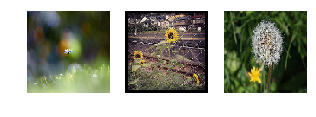

추정확률분포 [19,18,22,18,24] => 추정 dandelion : 정답 daisy => X
추정확률분포 [19,18,22,18,24] => 추정 dandelion : 정답 sunflower => X
추정확률분포 [19,18,22,18,24] => 추정 dandelion : 정답 dandelion => O


In [15]:
model_flower_LA.exec_all(report=2)

Model model_flower_LAB train started:
    Epoch 2: cost=1.513, accuracy=0.314/0.230 (653/653 secs)
    Epoch 4: cost=1.478, accuracy=0.328/0.340 (611/1264 secs)
    Epoch 6: cost=1.525, accuracy=0.301/0.240 (647/1911 secs)
    Epoch 8: cost=1.512, accuracy=0.339/0.180 (666/2577 secs)
    Epoch 10: cost=1.496, accuracy=0.348/0.130 (644/3221 secs)
Model model_flower_LAB train ended in 3221 secs:
Model model_flower_LAB test report: accuracy = 0.167, (20 secs)

Model model_flower_LAB Visualization


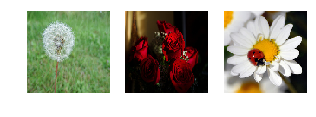

추정확률분포 [ 9, 5,29,45,13] => 추정 sunflower : 정답 dandelion => X
추정확률분포 [ 9,10,25,43,13] => 추정 sunflower : 정답 rose => X
추정확률분포 [ 9, 5,31,43,11] => 추정 sunflower : 정답 daisy => X


In [16]:
conf_flower_LAB = ['custom', {'name':'inception_flower', 'args':{'#act':'LAB'}}]
model_flower_LAB = CnnExtModel('model_flower_LAB', fd, 
                         conf_flower_LAB, dump_structure=False)
model_flower_LAB.exec_all(epoch_count=10, report=2)

Model model_flower_LAB train started:
    Epoch 2: cost=1.512, accuracy=0.327/0.330 (591/591 secs)
    Epoch 4: cost=1.346, accuracy=0.419/0.290 (636/1227 secs)
    Epoch 6: cost=1.321, accuracy=0.423/0.390 (615/1842 secs)
    Epoch 8: cost=1.308, accuracy=0.446/0.400 (612/2454 secs)
    Epoch 10: cost=1.292, accuracy=0.443/0.450 (643/3097 secs)
Model model_flower_LAB train ended in 3097 secs:
Model model_flower_LAB test report: accuracy = 0.425, (23 secs)

Model model_flower_LAB Visualization


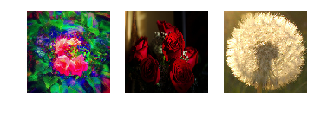

추정확률분포 [47, 0,51, 1, 0] => 추정 tulip : 정답 rose => X
추정확률분포 [48, 0,50, 1, 0] => 추정 tulip : 정답 rose => X
추정확률분포 [ 0, 0, 0, 0,100] => 추정 dandelion : 정답 dandelion => O


In [17]:
model_flower_LAB.exec_all(epoch_count=10, report=2)